In [120]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np
np.random.seed(0)
import random
import pylab
import pickle
import os

In [121]:
alpha = [chr(i) for i in range(1072, 1072 + 32)]
for i in alpha:
    print(i, end=' ')
    
MAXSYMBOLS = 150000

а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я 

In [122]:
def ConfMatrix(Text):
    matrix= [[0 for i in range(32)] for i in range(32)]
    
    for i in range(len(Text) - 1):
        if Text[i] == ' ': 
            continue
        if i == 0 and Text[i + 1] != ' ':
            matrix[ord(Text[i]) - 1072][ord(Text[i + 1]) - 1072] += 1
        else:
            if Text[i + 1] != ' ':
                matrix[ord(Text[i]) - 1072][ord(Text[i + 1]) - 1072] += 1
                
    return np.array(matrix)


def PlotMatrix(*matrix, **kwargs):
    fig, axs = plt.subplots(1, len(matrix), figsize=(19, 5))
    
    if len(matrix) == 1: axs = [axs]
    
    for i in range(len(matrix)):
        caxes = axs[i].matshow(matrix[i])
        
        xaxis = np.arange(len(alpha))
        axs[i].set_xticks(xaxis)
        axs[i].set_yticks(xaxis)
        axs[i].set_xticklabels(alpha)
        axs[i].set_yticklabels(alpha)
        
        axs[i].set_title(kwargs['titles'][i]) 

    fig.colorbar(caxes)
    fig.suptitle('Result')
    plt.show()
    
    
def ClearText(text):
    result = text
    result = result.lower()
    result = result.replace('ё', 'е').replace('\n', ' ').replace('\t', ' ')
    result = result.translate({ord(i) : ' ' for i in set(result) if i not in alpha})
    result = " ".join(result.split())
    return result

def MatchPercentage(t1, t2):
    
    l = min(len(t1), len(t2))
    a = sum(1 for i in range(l) if t1[i] == t2[i])
            
    return a / max(len(t1), len(t2))

def Analis(t1, t2, **kwargs):
    mt1, mt2 = ConfMatrix(t1), ConfMatrix(t2)
    mt1, mt2 = mt1 / mt1.max(), mt2 / mt2.max()
    print(f"Процент совпадения побуквенного анализа: {MatchPercentage(t1, t2) * 100.0}")
    PlotMatrix(mt1, mt2, **kwargs)
    E = np.ones((32, 32), dtype=np.float64)
    m = np.maximum(np.maximum(mt1, mt2), E)
    print("Средний процент частотного совпадения пар символов: {}".format((1.0 - (np.absolute(mt1 - mt2) / m).sum() / len(alpha)**2) * 100.0 ))

Различные тексты:

In [123]:
file = open(os.getcwd() + '\\Тарас Бульба.txt', 'r', encoding="utf-8")
Text1 = file.read()
Text1 = ClearText(Text1)[:MAXSYMBOLS]
print("Длина текста:", len(Text1))
print(set(Text1))
file.close()

Длина текста: 150000
{'д', 'с', 'ь', 'н', 'п', 'о', 'э', 'ш', ' ', 'г', 'й', 'у', 'ч', 'ф', 'ж', 'м', 'и', 'к', 'ц', 'в', 'ы', 'ъ', 'я', 'е', 'ю', 'х', 'р', 'б', 'т', 'а', 'л', 'з', 'щ'}


In [124]:
file = open(os.getcwd() + '\\Евгений Онегин.txt', 'r', encoding="utf-8")
Text2 = file.read()
Text2 = ClearText(Text2)[:MAXSYMBOLS]
print("Длина текста:", len(Text2))
print(set(Text2))
file.close()

Длина текста: 150000
{'д', 'с', 'п', 'н', 'э', 'о', 'ь', 'ш', ' ', 'й', 'г', 'у', 'ч', 'ф', 'ж', 'м', 'и', 'к', 'ц', 'в', 'ы', 'ъ', 'я', 'е', 'ю', 'х', 'р', 'б', 'т', 'а', 'л', 'з', 'щ'}


In [125]:
RandText1 = ""

for i in range(MAXSYMBOLS):
    RandText1 += random.choice(alpha + [' '])
    
print("Длина текста:", len(RandText1))
print(set(RandText1))

Длина текста: 150000
{'д', 'с', 'э', 'н', 'ь', 'о', 'п', 'ш', ' ', 'г', 'й', 'у', 'ч', 'ф', 'ж', 'м', 'и', 'ц', 'к', 'в', 'ы', 'ъ', 'я', 'е', 'ю', 'х', 'р', 'б', 'т', 'а', 'л', 'з', 'щ'}


In [126]:
RandText2 = ""

for i in range(MAXSYMBOLS):
    RandText2 += random.choice(alpha + [' '])
    
print("Длина текста:", len(RandText2))
print(set(RandText2))

Длина текста: 150000
{'д', 'с', 'э', 'н', 'ь', 'о', 'п', 'ш', ' ', 'й', 'г', 'у', 'ч', 'ф', 'ж', 'м', 'и', 'к', 'ц', 'в', 'ы', 'ъ', 'я', 'е', 'ю', 'х', 'р', 'б', 'т', 'а', 'л', 'з', 'щ'}


In [127]:
ListOfWords = Text1.split() + Text2.split()

In [128]:
RandTextWord1 = ""

while len(RandTextWord1) < MAXSYMBOLS:
    RandTextWord1 += random.choice(ListOfWords) + " "

RandTextWord1 = RandTextWord1[:MAXSYMBOLS]
    
print("Длина текста:", len(RandTextWord1))
print(set(RandTextWord1))

Длина текста: 150000
{'д', 'с', 'п', 'н', 'ь', 'о', 'э', 'ш', ' ', 'г', 'й', 'у', 'ч', 'ф', 'ж', 'м', 'и', 'к', 'ц', 'в', 'ы', 'ъ', 'я', 'е', 'ю', 'х', 'р', 'б', 'т', 'а', 'л', 'з', 'щ'}


In [129]:
RandTextWord2 = ""

while len(RandTextWord2) < MAXSYMBOLS:
    RandTextWord2 += random.choice(ListOfWords) + " "

RandTextWord2 = RandTextWord2[:MAXSYMBOLS]
    
print("Длина текста:", len(RandTextWord2))
print(set(RandTextWord2))

Длина текста: 150000
{'д', 'с', 'п', 'ь', 'н', 'о', 'э', 'ш', ' ', 'й', 'г', 'у', 'ч', 'ф', 'ж', 'м', 'и', 'к', 'ц', 'в', 'ы', 'ъ', 'я', 'е', 'ю', 'х', 'р', 'б', 'т', 'а', 'л', 'з', 'щ'}


#### 1. Два осмысленных текста на естественном языке

Процент совпадения побуквенного анализа: 6.688


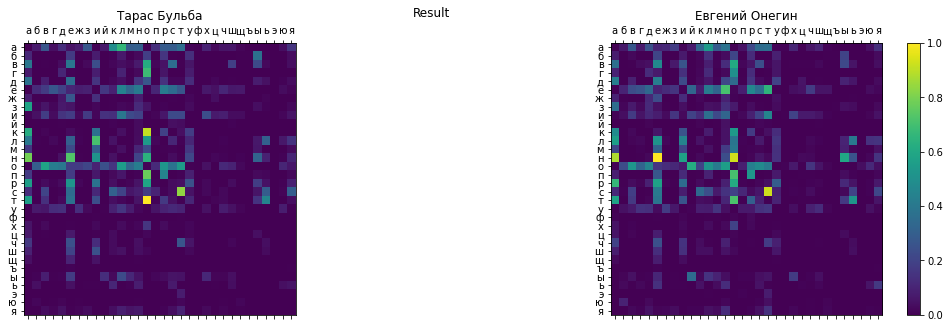

Средний процент частотного совпадения пар символов: 98.28088811286787


In [130]:
Analis(Text1, Text2, titles = ['Тарас Бульба', 'Евгений Онегин'])

#### 2. Осмысленный текст и текст из случайных букв

Процент совпадения побуквенного анализа: 3.037333333333333


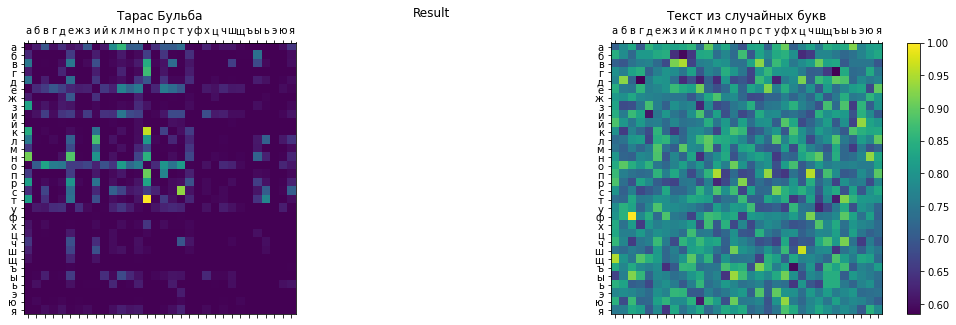

Средний процент частотного совпадения пар символов: 27.923914450966848


In [131]:
Analis(Text1, RandText1, titles = ['Тарас Бульба', 'Текст из случайных букв'])

#### 3. Осмысленный текст и текст из случайных слов

Процент совпадения побуквенного анализа: 6.573333333333334


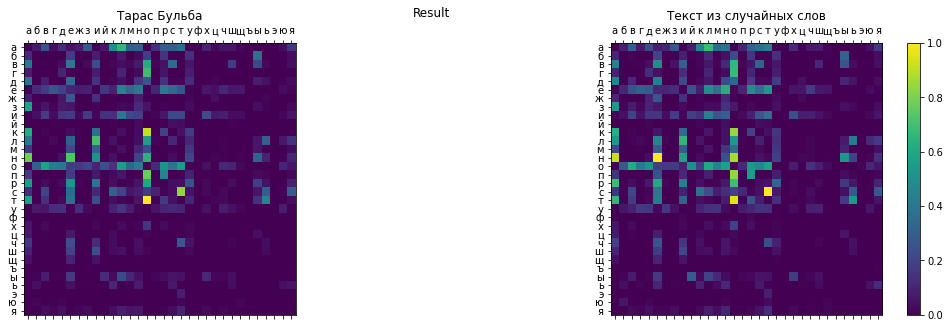

Средний процент частотного совпадения пар символов: 98.80160010267423


In [132]:
Analis(Text1, RandTextWord1, titles = ['Тарас Бульба', 'Текст из случайных слов'])

#### 4. Два текста из случайных букв

Процент совпадения побуквенного анализа: 3.021333333333333


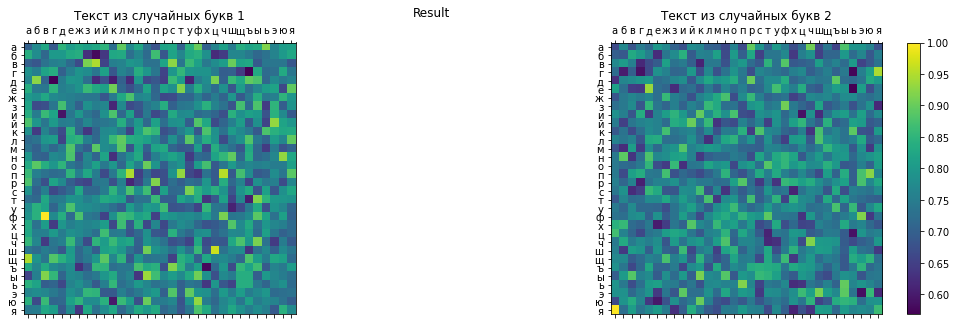

Средний процент частотного совпадения пар символов: 92.43792439426383


In [133]:
Analis(RandText1, RandText2, titles = ['Текст из случайных букв 1', 'Текст из случайных букв 2'])

#### 5. Два текста из случайных слов

Процент совпадения побуквенного анализа: 6.561999999999999


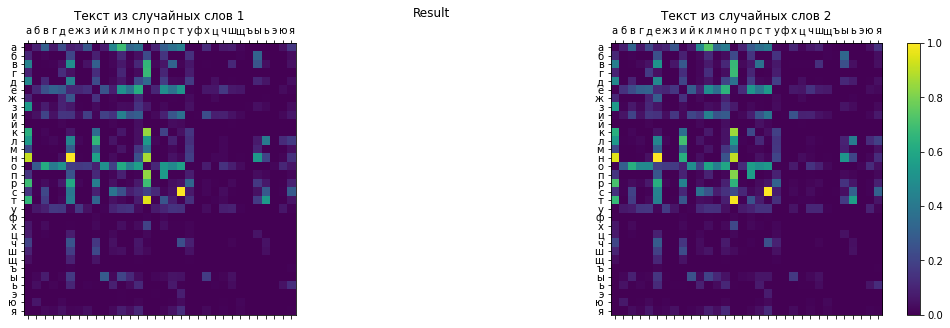

Средний процент частотного совпадения пар символов: 99.54586159618938


In [134]:
Analis(RandTextWord1, RandTextWord2, titles = ['Текст из случайных слов 1', 'Текст из случайных слов 2'])